## **Here's the final project and the steps for Data Storytelling Programming for Business Analytics using Python in Google Colab.**

## Data Preparation
## Data Warehousing
## Data Cleaning
## Data Analyisis
## Data Visualization

# **Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sp
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload = files.upload()

Saving CellphoneSales.csv to CellphoneSales.csv


# **Data Framework**

In [ ]:
# Another Way
df= pd.read_csv('/content/CellphoneSales.csv')

In [ ]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


# **Exploration Data Analysis**

In [ ]:
df.shape

(3114, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [ ]:
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

# **Data Cleaning:**



- Steps
1. Look into your Data
2. Look at the proportion of missing data
3. Check data type of each column
4. Deal with Missing Values (NaN Values)
5. Extract more information from your dataset to get more variables.
6. If you have duplicate values remove.
7. Check the unique values of columns.
8. If you want to remove a specific column that is not needed from the dataset, you can use the drop() function in Pandas.

Note: We do have many null values. Normally this can be drop directly but depending on our objective given that a column data is needed we need to execute DATA IMPUTATION otherwise we remove it..

Column with NAN values- Memory, Storage, Rating

To do:
1. Assess what type of data are missing
2. Assess what data imputation is appropriate (mean imputation, median imputation, mode imputation)
- Categorical Data uses mode imputation
- Numerical Data usses mean imputation
- Incorporated Data Information requires regression imputation

## Handling with missing data


**1. Handling Null Values on 'Rating'**

It's generally more appropriate to impute missing values in the 'Rating' column based solely on the available ratings in the dataset. This ensures that the imputed values are more representative of the overall distribution of ratings and reduces the risk of introducing bias or misinformation into the analysis and practice the following;

- **Independence of Rating**: The rating of a product may not solely depend on its brand or model. Other factors such as product features, user experience, and customer preferences can significantly influence the rating. Therefore, imputing missing ratings based only on brand or model averages might not accurately capture the true rating of each product.

- **Risk of Bias**: If we impute missing ratings based on brand or model averages, it could introduce bias, especially if certain brands or models have systematically higher or lower ratings. This bias could distort the overall distribution of ratings and affect subsequent analyses or decisions.

- **Loss of Information**: By imputing missing ratings based on brand or model averages, we effectively disregard the unique characteristics of each product. This approach overlooks potential variability in ratings within brands and models, leading to a loss of valuable information.

Therefore, the safe route is to conduct predictive regression analysis based on all factors on the data set. This will analyze the correlation of 'Rating' to relevant predictor such as ['Selling Price', 'Original Price', 'Discount', 'discount percentage'] and produce a predicted value given its relationship to its specific 'Selling Price', 'Original Price', 'Discount', 'discount percentage'.  

- To do this we will need to ensure first that our data type is integer or float other than that the prediction manipulation is not possible.

- Assess each relationship all 'Selling Price', 'Original Price', 'Discount', 'discount percentage' to 'Rating'.

- Transform, train, and split missing data from non-missing data to create prediction.

- Extract Predicted result and perform regression imputation on all 'Rating' null values.  

In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1: Identify relevant predictor variables
predictor_cols = ['Selling Price', 'Original Price', 'Discount', 'discount percentage']

# Step 2: Prepare data
non_missing_data = df.dropna(subset=['Rating'])
missing_data = df[df['Rating'].isnull()]

# Step 3: Fit a regression model
model = LinearRegression()
model.fit(non_missing_data[predictor_cols], non_missing_data['Rating'])

# Step 4: Predict missing ratings
missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])

# Step 5: Impute missing ratings
df.loc[df['Rating'].isnull(), 'Rating'] = missing_data['Rating_imputed']


<ipython-input-8-383a2de6d07d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])


In this code:

- Step 1: We identified 'Selling Price', 'Original Price', 'Discount', and 'discount percentage' as potential predictor variables.

- Step 2: We separated the data into two subsets: one with complete 'Rating' data and one with missing 'Rating' data.

- Step 3: We fitted a linear regression model using the complete data, with 'Selling Price', 'Original Price', 'Discount', and 'discount percentage' as independent variables and 'Rating' as the dependent variable.

- Step 4: We used the fitted model to predict missing 'Rating' values based on the values of the predictor variables.

- Step 5: We replaced the missing values in the 'Rating' column with the predicted values obtained from the regression model.

Adjust the predictor variables as needed based on the specific characteristics of your dataset and analysis requirements. Additionally, evaluate the performance of the regression model and validate the assumptions to ensure the reliability of the imputed values.

In [ ]:
df.isnull().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
dtype: int64

**2. Storage Regression Imputation**

- Step 1: Import necessary libraries (We have done this above so no need)
- Step 2: Identify predictor variables (Just like above)
- Step 3: Separate data with missing and non-missing values
- Step 4: Fit a regression model
- Step 5: Predict missing values
- Step 6: Replace missing values with imputed values
- Step 7: Check for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               3114 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


Notice that both Storage and Memory column are in 'object' Dtype form meaning both can be challenging when we are to perform data transformation and prediction for regression imputation.

- For this we need it first be converted to float by standardizing our data and removing text values.

In [ ]:
unique_storage_values = df['Storage'].nunique()
print("Number of unique values in the 'Storage' column:", unique_storage_values)

Number of unique values in the 'Storage' column: 26


In [ ]:
unique_storage_values = df['Storage'].unique()
print("Unique values in the 'Storage' column:", unique_storage_values)

Unique values in the 'Storage' column: ['128 GB' '16 GB' nan '64 GB' '16 MB' '512 GB' '256 GB' '32 GB' '8 GB'
 '2 MB' '4 GB' 'Expandable Upto 16 GB' '1 TB' '64 MB'
 'Expandable Upto 32 GB' '4 MB' '8 MB' '128 MB' '512 MB' '129 GB' '256 MB'
 '153 MB' '130 GB' '10 MB' '48 MB' '100 MB' '140 MB']


Notice we have MB, GB, NaN, Expandable Upto.

For this we need standardization.

To convert the values in the 'Storage' column to a standard float value representing the storage capacity in gigabytes (GB), we will need to handle the different formats of storage capacity:

- Convert values in megabyte (MB) format to gigabyte (GB) format.
- Extract the numerical part from values containing 'Expandable' and any other non-standard formats (Nan).
- Convert all values to a consistent format.

In [ ]:
# Define a function to convert storage values to float GB
def convert_to_gb(value):
    try:
        if pd.isna(value):
            return np.nan
        if 'TB' in value:
            return round(float(value.split(' ')[0]) * 1024, 2)  # Convert TB to GB with 2 decimal places
        if 'GB' in value:
            return round(float(value.split(' ')[0]), 2)  # Convert GB to float with 2 decimal places
        elif 'MB' in value:
            return round(float(value.split(' ')[0]) / 1024, 4)  # Convert MB to GB with 4 decimal places
        elif 'Expandable' in value:
            return np.nan  # Return NaN for 'Expandable' values
        else:
            return np.nan  # Return NaN for other non-numeric values
    except ValueError:
        return np.nan  # Return NaN if conversion to float fails

# Apply the function to the 'Storage' column and create a new column for converted values
df['Storage_GB'] = df['Storage'].apply(convert_to_gb)

# Print unique values after conversion
print("Unique values in the 'Storage' column (in GB):", df['Storage_GB'].unique())

Unique values in the 'Storage' column (in GB): [1.280e+02 1.600e+01       nan 6.400e+01 1.560e-02 5.120e+02 2.560e+02
 3.200e+01 8.000e+00 2.000e-03 4.000e+00 1.024e+03 6.250e-02 3.900e-03
 7.800e-03 1.250e-01 5.000e-01 1.290e+02 2.500e-01 1.494e-01 1.300e+02
 9.800e-03 4.690e-02 9.770e-02 1.367e-01]


In [ ]:
df.head(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.0000
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000,16.0000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.400000,6999,7999,realme C2,1000,12.501563,NaN
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000,64.0000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000,64.0000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.000000,2199,2199,GIONEE L800,0,0.000000,0.0156
6,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,4.616732,99900,99900,Apple iPhone 13 Mini,0,0.000000,512.0000
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.600000,42999,47900,Apple iPhone XR,4901,10.231733,64.0000
8,SAMSUNG,Galaxy E5,Brown,1.5 GB,16 GB,Yes,4.200000,20400,20400,SAMSUNG Galaxy E5,0,0.000000,16.0000
9,Xiaomi,Redmi Note 11T 5G,Aquamarine Blue,8 GB,128 GB,Yes,4.300000,21736,22999,Xiaomi Redmi Note 11T 5G,1263,5.491543,128.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               3114 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
 12  Storage_GB           3051 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 316.4+ KB


In [ ]:
df.isnull().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
Storage_GB             63
dtype: int64

Notice that we have successfully converted or 'Storage' data into float from being an object and standardized it.

We now can handle the missing value inside Storage data for imputation from regression prediction using the 'Storage_GB'.

We can now drop the 'Storage' column.

- Notice it increases from 39 to 62. This is because two in our data type had different text format. Here, since we are to perform prediction regression imputation analysis it is safe to consider as valid.


In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1: Identify relevant predictor variables
predictor_cols = ['Selling Price', 'Original Price', 'Discount', 'discount percentage']

# Step 2: Separate data
non_missing_data = df.dropna(subset=['Storage_GB'])
missing_data = df[df['Storage_GB'].isnull()]

# Step 3: Fit a regression model
model = LinearRegression()
model.fit(non_missing_data[predictor_cols], non_missing_data['Storage_GB'])

# Step 4: Predict missing ratings
missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])

# Step 5: Impute missing ratings
df.loc[df['Storage_GB'].isnull(), 'Storage_GB'] = missing_data['Rating_imputed']


<ipython-input-17-98989bce3fa8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])


In [ ]:
df.isnull().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Storage                39
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
Storage_GB              0
dtype: int64

In [ ]:
df


,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000,16.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.400000,6999,7999,realme C2,1000,12.501563,46.426977
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000,64.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.400000,16999,19999,POCO M4 Pro 5G,3000,15.000750,128.000000
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.600000,3499,3499,Nokia 225,0,0.000000,19.109323
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.500000,44900,44900,Apple iPhone SE,0,0.000000,128.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,4.718295,119900,119900,Apple iPhone 13 Pro,0,0.000000,128.000000


In [ ]:
display(df['Storage_GB'].unique())

array([1.28000000e+02, 1.60000000e+01, 4.64269770e+01, 6.40000000e+01,
       1.56000000e-02, 5.12000000e+02, 2.56000000e+02, 3.20000000e+01,
       5.37983053e+01, 8.00000000e+00, 4.84897825e+01, 7.27742068e+01,
       2.00000000e-03, 1.02566085e+02, 4.00000000e+00, 5.43865170e+01,
       4.57028113e+01, 6.28805809e+01, 1.43661854e+01, 7.17814942e+01,
       1.02400000e+03, 6.25000000e-02, 1.43365222e+01, 6.03441909e+01,
       2.02572871e+01, 3.90000000e-03, 1.91093232e+01, 7.80000000e-03,
       1.25000000e-01, 1.35504487e+01, 1.76676941e+01, 5.00000000e-01,
       1.29000000e+02, 2.50000000e-01, 7.29352985e+01, 1.99992177e+01,
       3.06779519e+01, 1.49400000e-01, 3.83636742e+01, 5.42370266e+02,
       1.30000000e+02, 1.12254582e+02, 7.72998102e+01, 3.94054513e+02,
       9.80000000e-03, 6.31018387e+01, 1.46331537e+01, 7.10198368e+01,
       6.21208916e+01, 1.88156580e+01, 4.69000000e-02, 6.47783359e+01,
       1.10635919e+02, 1.74511531e+01, 7.29798137e+01, 1.72138478e+01,
      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               3114 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
 12  Storage_GB           3114 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 316.4+ KB


In [ ]:
# Dropping the 'Storage' column
df.drop(columns=['Storage'], inplace=True)

In [ ]:
df

,Brands,Models,Colors,Memory,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000
1,Nokia,3.2,Steel,2 GB,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000,16.000000
2,realme,C2,Diamond Black,2 GB,Yes,4.400000,6999,7999,realme C2,1000,12.501563,46.426977
3,Infinix,Note 5,Ice Blue,4 GB,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000,64.000000
4,Apple,iPhone 11,Black,4GB,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000,64.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,Yes,4.400000,16999,19999,POCO M4 Pro 5G,3000,15.000750,128.000000
3110,Nokia,225,Black,NaN,Yes,3.600000,3499,3499,Nokia 225,0,0.000000,19.109323
3111,Apple,iPhone SE,White,2 GB,Yes,4.500000,44900,44900,Apple iPhone SE,0,0.000000,128.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,Yes,4.718295,119900,119900,Apple iPhone 13 Pro,0,0.000000,128.000000


In [ ]:
df.isnull().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
Storage_GB              0
dtype: int64

**3. Memory Regression Imputation**

Notice that we are facing similar problem.

Actions Needed

A. Convert object data to float
- To do this we are to use standardization and convert all TB, and MB into GB

B. Replace NAN with the predicted memory if it is correlated by ['Selling Price', 'Original Price', 'Discount', 'discount percentage']


In [ ]:
df['Memory'].unique()

array(['8 GB', '2 GB', '4 GB', '4GB', '8 MB', '6 GB', '3 GB', '1.5 GB',
       nan, '1 GB', '2 MB', '512 MB', '12 GB', '768 MB', '10 MB', '32 MB',
       '4 MB', '16 MB', '64 MB', '128 MB', '153 MB', '30 MB', '46 MB',
       '18 GB', '32 GB', '100 MB', '16 GB'], dtype=object)

In [ ]:
# Define a function to convert storage values to float GB
def convert_to_gb(value):
    try:
        if pd.isna(value):
            return np.nan
        if 'GB' in value:
            return round(float(value.split(' ')[0]), 2)  # Convert GB to float with 2 decimal places
        elif 'MB' in value:
            return round(float(value.split(' ')[0]) / 1024, 4)  # Convert MB to GB with 2 decimal places
        else:
            return np.nan  # Return NaN for other non-numeric values
    except ValueError:
        return np.nan  # Return NaN if conversion to float fails


# Apply the function to the 'Storage' column and create a new column for converted values
df['Memory_GB'] = df['Memory'].apply(convert_to_gb)

# Print unique values after conversion
print("Unique values in the 'Memory' column (in GB):", df['Memory_GB'].unique())


Unique values in the 'Memory' column (in GB): [8.000e+00 2.000e+00 4.000e+00       nan 7.800e-03 6.000e+00 3.000e+00
 1.500e+00 1.000e+00 2.000e-03 5.000e-01 1.200e+01 7.500e-01 9.800e-03
 3.120e-02 3.900e-03 1.560e-02 6.250e-02 1.250e-01 1.494e-01 2.930e-02
 4.490e-02 1.800e+01 3.200e+01 9.770e-02 1.600e+01]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Camera               3114 non-null   object 
 5   Rating               3114 non-null   float64
 6   Selling Price        3114 non-null   int64  
 7   Original Price       3114 non-null   int64  
 8   Mobile               3114 non-null   object 
 9   Discount             3114 non-null   int64  
 10  discount percentage  3114 non-null   float64
 11  Storage_GB           3114 non-null   float64
 12  Memory_GB            2934 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 316.4+ KB


In [ ]:
df.isnull().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Camera                   0
Rating                   0
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
Storage_GB               0
Memory_GB              180
dtype: int64

Here, we find that the data format itself is not standardize. Our code treat this a another entity which result to direct NAN value. Notice that above our null value grow from 40 to 153 which means we need to consider the format of each and its uniqueness. Let's check below.  

In [ ]:
df['Memory'].unique()

array(['8 GB', '2 GB', '4 GB', '4GB', '8 MB', '6 GB', '3 GB', '1.5 GB',
       nan, '1 GB', '2 MB', '512 MB', '12 GB', '768 MB', '10 MB', '32 MB',
       '4 MB', '16 MB', '64 MB', '128 MB', '153 MB', '30 MB', '46 MB',
       '18 GB', '32 GB', '100 MB', '16 GB'], dtype=object)

We find that '8 GB' differs from '4GB' in between space, '1.5 GB' in decimal format. Though they were all in GB, they differ on format leading our code treat them as not similar. To fix this, let's go below and check if this is now the same.


In [ ]:
def convert_to_gb(value):
    try:
        if pd.isna(value):
            return np.nan

        # Remove spaces and ensure lowercase for consistency
        value = value.strip().lower()

        # Check if the value contains 'gb' or 'mb'
        if 'gb' in value:
            # Extract the numerical value and convert to float
            numerical_value = float(value.split('gb')[0].strip())
            # Return the value directly if it's already in GB
            return numerical_value if numerical_value >= 1 else numerical_value * 1024  # Convert MB to GB
        elif 'mb' in value:
            # Extract the numerical value and convert to float
            numerical_value = float(value.split('mb')[0].strip())
            return numerical_value / 1024  # Convert MB to GB

        # If the unit is not specified, assume GB
        return float(value)
    except ValueError:
        return np.nan  # Return NaN if conversion to float fails

# Apply the function to the 'Storage' column and create a new column for converted values
df['Memory_GB'] = df['Memory'].apply(convert_to_gb)

# Print unique values after conversion
print("Unique values in the 'Memory' column (in GB):", df['Memory_GB'].unique())

Unique values in the 'Memory' column (in GB): [8.00000000e+00 2.00000000e+00 4.00000000e+00 7.81250000e-03
 6.00000000e+00 3.00000000e+00 1.50000000e+00            nan
 1.00000000e+00 1.95312500e-03 5.00000000e-01 1.20000000e+01
 7.50000000e-01 9.76562500e-03 3.12500000e-02 3.90625000e-03
 1.56250000e-02 6.25000000e-02 1.25000000e-01 1.49414062e-01
 2.92968750e-02 4.49218750e-02 1.80000000e+01 3.20000000e+01
 9.76562500e-02 1.60000000e+01]


In [ ]:
df.isnull().sum()

Brands                  0
Models                  0
Colors                  0
Memory                 43
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
Mobile                  0
Discount                0
discount percentage     0
Storage_GB              0
Memory_GB              43
dtype: int64

Problem fixed. Now we've converted our "Memory"column into float. We can now drop this and work on 'Memory_GB' null data regression imputation.

In [ ]:
df.drop(columns=['Memory'], inplace=True)

In [ ]:
df

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB,Memory_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000,8.0
1,Nokia,3.2,Steel,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000,16.000000,2.0
2,realme,C2,Diamond Black,Yes,4.400000,6999,7999,realme C2,1000,12.501563,46.426977,2.0
3,Infinix,Note 5,Ice Blue,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000,64.000000,4.0
4,Apple,iPhone 11,Black,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000,64.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,Yes,4.400000,16999,19999,POCO M4 Pro 5G,3000,15.000750,128.000000,6.0
3110,Nokia,225,Black,Yes,3.600000,3499,3499,Nokia 225,0,0.000000,19.109323,NaN
3111,Apple,iPhone SE,White,Yes,4.500000,44900,44900,Apple iPhone SE,0,0.000000,128.000000,2.0
3112,Apple,iPhone 13 Pro,Gold,Yes,4.718295,119900,119900,Apple iPhone 13 Pro,0,0.000000,128.000000,6.0


In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1: Identify relevant predictor variables
predictor_cols = ['Selling Price', 'Original Price', 'Discount', 'discount percentage']

# Step 2: Prepare data
non_missing_data = df.dropna(subset=['Memory_GB'])
missing_data = df[df['Memory_GB'].isnull()]

# Step 3: Fit a regression model
model = LinearRegression()
model.fit(non_missing_data[predictor_cols], non_missing_data['Memory_GB'])

# Step 4: Predict missing ratings
missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])

# Step 5: Impute missing ratings
df.loc[df['Memory_GB'].isnull(), 'Memory_GB'] = missing_data['Rating_imputed']


<ipython-input-34-07b9e00b5df5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['Rating_imputed'] = model.predict(missing_data[predictor_cols])


Now let's check any missing values and data types

In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


Brands                 0
Models                 0
Colors                 0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
Storage_GB             0
Memory_GB              0
dtype: int64

In [ ]:
print("Data Type Information:")
df.info()

Data Type Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Camera               3114 non-null   object 
 4   Rating               3114 non-null   float64
 5   Selling Price        3114 non-null   int64  
 6   Original Price       3114 non-null   int64  
 7   Mobile               3114 non-null   object 
 8   Discount             3114 non-null   int64  
 9   discount percentage  3114 non-null   float64
 10  Storage_GB           3114 non-null   float64
 11  Memory_GB            3114 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 292.1+ KB


Now our data is fine. Let's check any dupliates.

In [ ]:
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

108

In [ ]:
df = df.drop_duplicates()
df.shape

(3006, 12)

# **Data Analysis and Visualization:**

Perform:
1. Apply an aggregation function such as sum(), mean(), count(), max(), or min() to calculate aggregate values for each group.
2. Filtering:
Use conditional statements and boolean indexing to filter the data based on specific criteria.
3. Apply Data Visualization

In [ ]:
df.nunique()

Brands                  17
Models                 914
Colors                 639
Camera                   1
Rating                  83
Selling Price          844
Original Price         819
Mobile                 928
Discount               267
discount percentage    539
Storage_GB              72
Memory_GB               53
dtype: int64

In [ ]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage,Storage_GB,Memory_GB
count,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000
mean,4.244788,25842.448436,27722.581504,1880.133067,6.133658,90.790627,4.155320
std,0.274683,29658.810517,31117.486618,5325.802480,11.193253,110.973867,2.506208
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641,0.002000,0.001953
25%,4.100000,9978.500000,10000.000000,0.000000,0.000000,32.000000,3.000000
50%,4.300000,14999.000000,15999.000000,0.000000,0.000000,64.000000,4.000000
75%,4.400000,27499.000000,29999.000000,2000.000000,9.863326,128.000000,6.000000
max,5.026889,179900.000000,189999.000000,75000.000000,70.610305,1024.000000,32.000000


**Sample Analysis**

In [ ]:
df

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB,Memory_GB
0,SAMSUNG,GALAXY M31S,Mirage Black,Yes,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000000,8.000000
1,Nokia,3.2,Steel,Yes,3.800000,10199,10199,Nokia 3.2,0,0.000000,16.000000,2.000000
2,realme,C2,Diamond Black,Yes,4.400000,6999,7999,realme C2,1000,12.501563,46.426977,2.000000
3,Infinix,Note 5,Ice Blue,Yes,4.200000,12999,12999,Infinix Note 5,0,0.000000,64.000000,4.000000
4,Apple,iPhone 11,Black,Yes,4.600000,49900,49900,Apple iPhone 11,0,0.000000,64.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,Yes,4.000000,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000,4.000000,0.500000
3108,SAMSUNG,Metro 313,Black,Yes,4.200000,2299,2299,SAMSUNG Metro 313,0,0.000000,0.002000,0.003906
3109,POCO,M4 Pro 5G,Cool Blue,Yes,4.400000,16999,19999,POCO M4 Pro 5G,3000,15.000750,128.000000,6.000000
3112,Apple,iPhone 13 Pro,Gold,Yes,4.718295,119900,119900,Apple iPhone 13 Pro,0,0.000000,128.000000,6.000000


In [ ]:
df[df['Original Price']>80000]

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB,Memory_GB
6,Apple,iPhone 13 Mini,Pink,Yes,4.616732,99900,99900,Apple iPhone 13 Mini,0,0.000000,512.0,6.000000
76,SAMSUNG,Galaxy S10,Prism White,Yes,4.600000,92000,92000,SAMSUNG Galaxy S10,0,0.000000,512.0,8.000000
92,Apple,iPhone 12 Pro Max,Gold,Yes,4.600000,149900,149900,Apple iPhone 12 Pro Max,0,0.000000,512.0,6.957877
100,Apple,iPhone 11 Pro Max,Gold,Yes,4.700000,131900,131900,Apple iPhone 11 Pro Max,0,0.000000,256.0,4.000000
138,Apple,iPhone 13,Starlight,Yes,4.669467,109900,109900,Apple iPhone 13,0,0.000000,512.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3093,Apple,iPhone XS,Gold,Yes,4.700000,134900,134900,Apple iPhone XS,0,0.000000,512.0,4.000000
3099,SAMSUNG,Galaxy Fold 2,Mystic Bronze,Yes,3.000000,149999,189999,SAMSUNG Galaxy Fold 2,40000,21.052742,256.0,12.000000
3103,Apple,iPhone X,Space Gray,Yes,4.600000,91900,91900,Apple iPhone X,0,0.000000,64.0,3.000000
3105,Apple,iPhone 13 Pro Max,Gold,Yes,4.769076,129900,129900,Apple iPhone 13 Pro Max,0,0.000000,128.0,6.000000


In [ ]:
df[df['Rating']==5]

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB,Memory_GB
247,vivo,X50,Frost Blue,Yes,5.0,44990,44990,vivo X50,0,0.0,256.0000,8.000000
1446,vivo,Z1x,Phantom Purple,Yes,5.0,19990,19990,vivo Z1x,0,0.0,64.0000,6.000000
1655,vivo,X60 Pro,Shimmer Blue,Yes,5.0,48780,48780,vivo X60 Pro,0,0.0,256.0000,12.000000
2242,SAMSUNG,SM-B310EZDDINS,Black,Yes,5.0,1949,1949,SAMSUNG SM-B310EZDDINS,0,0.0,0.0977,0.097656
2483,Apple,iPhone 7 Plus,Red,Yes,5.0,85400,85400,Apple iPhone 7 Plus,0,0.0,256.0000,3.000000
2879,vivo,S2,Diamond Black,Yes,5.0,19990,19990,vivo S2,0,0.0,128.0000,4.000000


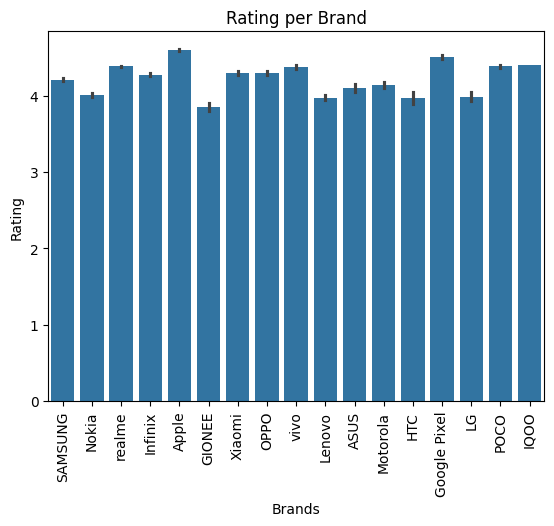

In [ ]:
sp.barplot(x='Brands', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Rating per Brand")
plt.show()


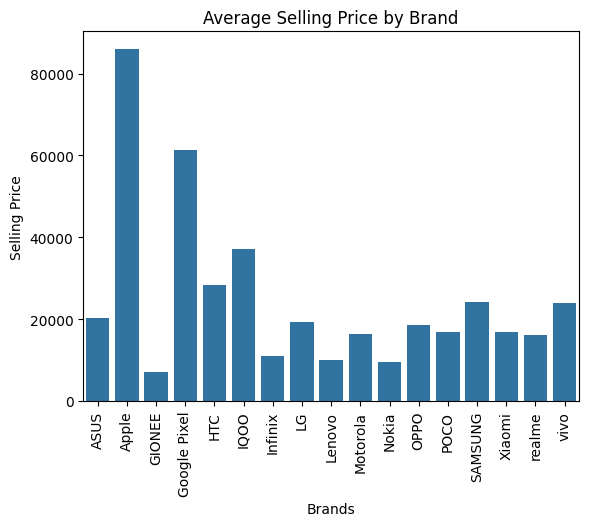

In [ ]:
average_price_by_brand = df.groupby('Brands')['Selling Price'].mean().reset_index()

# Create the bar plot
sp.barplot(x='Brands', y='Selling Price', data=average_price_by_brand)
plt.title("Average Selling Price by Brand")
plt.xticks(rotation=90)
plt.show()


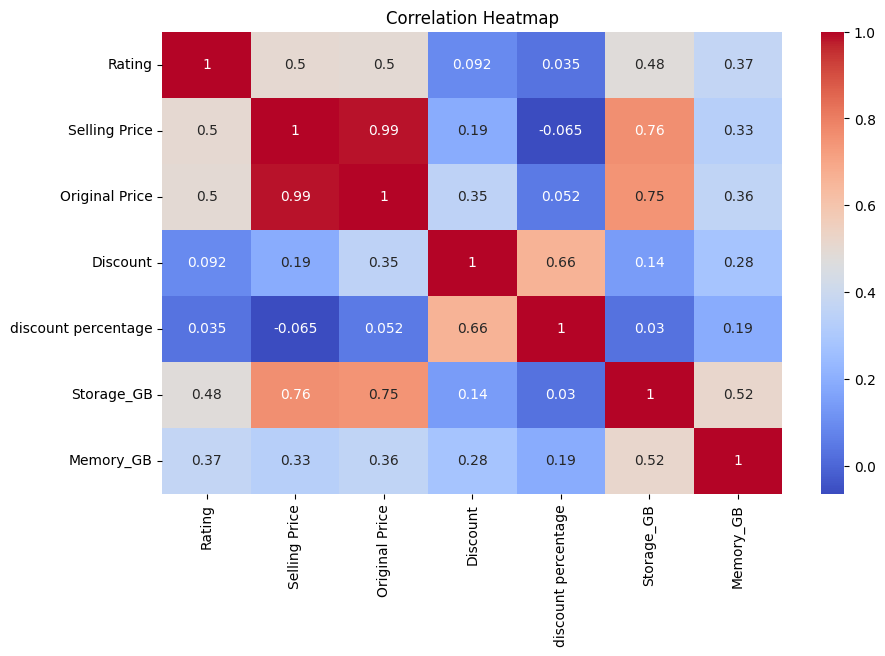

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sp.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.to_excel("Clean_data.xlsx", engine = 'openpyxl')

In [ ]:
df['Brands'] = df['Brands'].str.lower()

# Define the brand you want to filter for
brand_to_filter = 'samsung'

# Filter the DataFrame for the specified brand
samsung_data = df[df['Brands'] == brand_to_filter]

# Display filtered data
print(samsung_data)

       Brands              Models         Colors Camera  Rating  \
0     samsung        GALAXY M31S    Mirage Black    Yes     4.3   
8     samsung          Galaxy E5           Brown    Yes     4.2   
10    samsung         Galaxy A12           Black    Yes     4.2   
17    samsung     Galaxy J2 Core            Gold    Yes     4.2   
28    samsung     Galaxy S9 Plus    Polaris Blue    Yes     4.5   
...       ...                 ...            ...    ...     ...   
3096  samsung  Metro 313 Dual Sim          Black    Yes     4.3   
3099  samsung      Galaxy Fold 2   Mystic Bronze    Yes     3.0   
3102  samsung   Galaxy S20 Ultra    Cosmic Black    Yes     4.2   
3107  samsung    Galaxy S Duos 2           Black    Yes     4.0   
3108  samsung           Metro 313          Black    Yes     4.2   

      Selling Price  Original Price                      Mobile  Discount  \
0             19330           20999        SAMSUNG GALAXY M31S       1669   
8             20400           20400      

<ipython-input-49-333e7db0e0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brands'] = df['Brands'].str.lower()


In [ ]:
display(samsung_data)

,Brands,Models,Colors,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage,Storage_GB,Memory_GB
0,samsung,GALAXY M31S,Mirage Black,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998,128.000,8.000000
8,samsung,Galaxy E5,Brown,Yes,4.2,20400,20400,SAMSUNG Galaxy E5,0,0.000000,16.000,1.500000
10,samsung,Galaxy A12,Black,Yes,4.2,11989,11989,SAMSUNG Galaxy A12,0,0.000000,64.000,4.000000
17,samsung,Galaxy J2 Core,Gold,Yes,4.2,6999,6999,SAMSUNG Galaxy J2 Core,0,0.000000,16.000,1.000000
28,samsung,Galaxy S9 Plus,Polaris Blue,Yes,4.5,70000,70000,SAMSUNG Galaxy S9 Plus,0,0.000000,64.000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3096,samsung,Metro 313 Dual Sim,Black,Yes,4.3,2340,2340,SAMSUNG Metro 313 Dual Sim,0,0.000000,0.002,0.003906
3099,samsung,Galaxy Fold 2,Mystic Bronze,Yes,3.0,149999,189999,SAMSUNG Galaxy Fold 2,40000,21.052742,256.000,12.000000
3102,samsung,Galaxy S20 Ultra,Cosmic Black,Yes,4.2,70490,70999,SAMSUNG Galaxy S20 Ultra,509,0.716912,128.000,12.000000
3107,samsung,Galaxy S Duos 2,Black,Yes,4.0,5999,5999,SAMSUNG Galaxy S Duos 2,0,0.000000,4.000,0.500000


In [ ]:
# Data Engineered by DMiss Ho